In [4]:
import gc
import os
import time


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import wordcloud
from tqdm import tqdm
import warnings

warnings.filterwarnings('ignore')
tqdm.pandas()
sns.set_style('whitegrid')

In [77]:
gc.collect()

1680

In [21]:
BASE_PATH = 'C:\\Users\\eeshs\\Downloads\\covid19-in-india'

In [19]:
csv_list = os.listdir('C:\\Users\\eeshs\\Downloads\\covid19-in-india')

In [76]:
covid_data = pd.read_csv(f"{BASE_PATH}//{csv_list[0]}")
hospital_beds = pd.read_csv(f"{BASE_PATH}//{csv_list[1]}")
individual_details = pd.read_csv(f"{BASE_PATH}//{csv_list[2]}")
population = pd.read_csv(f"{BASE_PATH}//{csv_list[3]}")

# All cases wise Covid-19 confirmed cases analysis

In [69]:
covid_data.head()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,30/01/20,Kerala,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,31/01/20,Kerala,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,01/02/20,Kerala,2,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,02/02/20,Kerala,3,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,03/02/20,Kerala,3,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
covid_data.drop(covid_data.iloc[:,7:], inplace=True, axis=1)

In [79]:
covid_data.sample(5)

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
300,301,23/03/20,Karnataka,33,0,2,1
303,304,23/03/20,Maharashtra,71,3,0,2
261,262,21/03/20,Rajasthan,15,2,3,0
180,181,17/03/20,Karnataka,11,0,0,1
133,134,13/03/20,Maharashtra,14,0,0,0


In [80]:
covid_data["total_confirmed"] = covid_data["ConfirmedIndianNational"] + covid_data["ConfirmedForeignNational"]

In [82]:
covid_data["Date"] = pd.to_datetime(covid_data["Date"], format='%d/%m/%y')

In [83]:
covid_data.head()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,total_confirmed
0,1,2020-01-30,Kerala,1,0,0,0,1
1,2,2020-01-31,Kerala,1,0,0,0,1
2,3,2020-02-01,Kerala,2,0,0,0,2
3,4,2020-02-02,Kerala,3,0,0,0,3
4,5,2020-02-03,Kerala,3,0,0,0,3


In [84]:
sorted_data = covid_data.sort_values(by=["total_confirmed"], ascending=False)

In [85]:
sorted_data.head()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,total_confirmed
324,325,2020-03-24,Kerala,87,8,4,0,95
326,327,2020-03-24,Maharashtra,86,3,0,2,89
303,304,2020-03-23,Maharashtra,71,3,0,2,74
301,302,2020-03-23,Kerala,60,7,3,0,67
280,281,2020-03-22,Maharashtra,64,3,0,2,67


In [86]:
sorted_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 324 to 0
Data columns (total 8 columns):
Sno                         340 non-null int64
Date                        340 non-null datetime64[ns]
State/UnionTerritory        340 non-null object
ConfirmedIndianNational     340 non-null int64
ConfirmedForeignNational    340 non-null int64
Cured                       340 non-null int64
Deaths                      340 non-null int64
total_confirmed             340 non-null int64
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 23.9+ KB


# Date wise analysis

In [127]:
exp_raise_df = sorted_data.groupby("Date").agg({"total_confirmed":"sum"}).sort_values(by="total_confirmed",ascending=False)

In [128]:
exp_raise_df.reset_index(inplace=True)

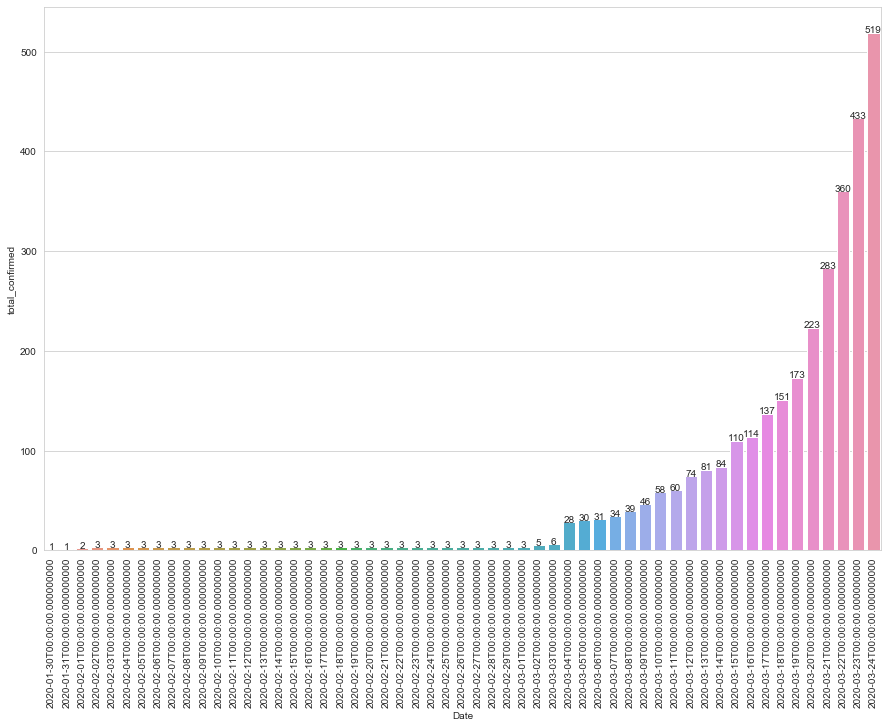

In [129]:
plt.figure(figsize=(15,10))
ax=sns.barplot(x=exp_raise_df["Date"], y=exp_raise_df["total_confirmed"])
plt.xticks(rotation=90)
for i, v in enumerate(exp_raise_df["total_confirmed"].sort_values(ascending=True)):
    ax.text(i ,v, "{:,}".format(v), ha="center")

# State wise grouped Analysis

In [130]:
state_df = covid_data.groupby("State/UnionTerritory").agg({"total_confirmed":"max"}).sort_values(by="total_confirmed",ascending=False)

In [131]:
state_df.reset_index(inplace=True)

In [132]:
state_df.head()

,State/UnionTerritory,total_confirmed
0,Kerala,95
1,Maharashtra,89
2,Karnataka,37
3,Telengana,35
4,Uttar Pradesh,33


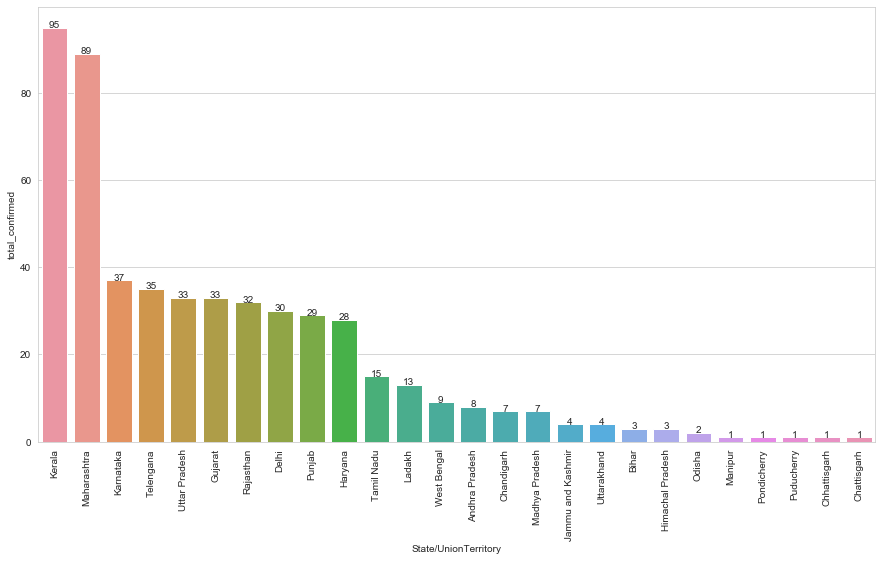

In [141]:
plt.figure(figsize=(15,8))
ax=sns.barplot(x=state_df["State/UnionTerritory"], y=state_df["total_confirmed"])
plt.xticks(rotation=90)
for i, v in enumerate(state_df["total_confirmed"].sort_values(ascending=False)):
    ax.text(i ,v, "{:,}".format(v), ha="center")

In [150]:
individual_details.head(10)

,ID,Unique id,Government id,Diagnosed date,Age,Gender,Detected city,Detected city pt,Detected district,Detected state,Nationality,Current status,Status change date,Notes,Current location,Current location pt,Created on,Updated on,Contacts
0,1,1,KL-TS-P1,30/Jan/2020,20.0,Female,Thrissur,SRID=4326;POINT (76.21325419999999 10.5256264),Thrissur,Kerala,India,Recovered,02/14/2020,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (76.21325419999999 10.5256264),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,NaN
1,2,2,KL-AL-P1,02/Feb/2020,NaN,Unknown,Alappuzha,SRID=4326;POINT (76.333482 9.498000100000001),Alappuzha,Kerala,India,Recovered,02/14/2020,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (76.333482 9.498000100000001),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,NaN
2,3,3,KL-KS-P1,03/Feb/2020,NaN,Unknown,Kasargode,SRID=4326;POINT (80 20),Kasaragod,Kerala,India,Recovered,02/14/2020,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (80 20),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,NaN
3,4,4,DL-P1,02/Mar/2020,45.0,Male,East Delhi (Mayur Vihar),SRID=4326;POINT (80 20),East Delhi,Delhi,India,Recovered,03/15/2020,"Travelled from Austria, Italy.\nTravel history...",NaN,SRID=4326;POINT (80 20),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,"Patient 22:, Patient 23:, Patient 24:, Patient..."
4,5,5,TS-P1,02/Mar/2020,NaN,Unknown,Hyderabad,SRID=4326;POINT (78.4349398685041 17.4263524),Hyderabad,Telangana,India,Recovered,03/02/2020,"Travelled from Dubai, Singapore contact.\nTrav...",NaN,SRID=4326;POINT (78.4349398685041 17.4263524),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,NaN
5,6,6,NaN,03/Mar/2020,69.0,Male,Jaipur,SRID=4326;POINT (75.82034899999999 26.916194),Jaipur,Rajasthan,Italy,Recovered,03/03/2020,Travelled from Italy.\nItalian tourist,NaN,SRID=4326;POINT (75.82034899999999 26.916194),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,"Patient 7:, Patient 8:, Patient 9:, Patient 10..."
6,7,7,NaN,04/Mar/2020,55.0,Unknown,Gurugram,SRID=4326;POINT (77.0299194 28.4646148),Gurugram,Haryana,Italy,Hospitalized,03/04/2020,Travelled from Italy.\nItalian tourist,NaN,SRID=4326;POINT (77.0299194 28.4646148),03/23/2020 12:20 p.m.,03/23/2020 12:34 p.m.,Patient 6:
7,8,8,NaN,04/Mar/2020,55.0,Unknown,Gurugram,SRID=4326;POINT (77.0299194 28.4646148),Gurugram,Haryana,Italy,Hospitalized,03/04/2020,Travelled from Italy.\nItalian tourist,NaN,SRID=4326;POINT (77.0299194 28.4646148),03/23/2020 12:20 p.m.,03/23/2020 12:34 p.m.,Patient 6:
8,9,9,NaN,04/Mar/2020,55.0,Unknown,Gurugram,SRID=4326;POINT (77.0299194 28.4646148),Gurugram,Haryana,Italy,Hospitalized,03/04/2020,Travelled from Italy.\nItalian tourist,NaN,SRID=4326;POINT (77.0299194 28.4646148),03/23/2020 12:20 p.m.,03/23/2020 12:34 p.m.,Patient 6:
9,10,10,NaN,04/Mar/2020,55.0,Unknown,Gurugram,SRID=4326;POINT (77.0299194 28.4646148),Gurugram,Haryana,Italy,Hospitalized,03/04/2020,Travelled from Italy.\nItalian tourist,NaN,SRID=4326;POINT (77.0299194 28.4646148),03/23/2020 12:20 p.m.,03/23/2020 12:34 p.m.,Patient 6:


In [162]:
mumbai_cases = individual_details[individual_details["Detected city"]=="Mumbai"]

In [186]:
mumbai_cases.head(30)

,ID,Unique id,Government id,Diagnosed date,Age,Gender,Detected city,Detected city pt,Detected district,Detected state,Nationality,Current status,Status change date,Notes,Current location,Current location pt,Created on,Updated on,Contacts
65,66,66,NaN,11/Mar/2020,70.0,Male,Mumbai,SRID=4326;POINT (72.8353355 18.9387711),Mumbai,Maharashtra,India,Hospitalized,03/11/2020,"Travelled from Dubai, Co-passengers P44, P45, ...",NaN,SRID=4326;POINT (72.8353355 18.9387711),03/23/2020 12:21 p.m.,03/23/2020 12:21 p.m.,NaN
66,67,67,NaN,11/Mar/2020,68.0,Female,Mumbai,SRID=4326;POINT (72.8353355 18.9387711),Mumbai,Maharashtra,India,Hospitalized,03/11/2020,"Travelled from Dubai, Co-passengers P44, P45, ...",NaN,SRID=4326;POINT (72.8353355 18.9387711),03/23/2020 12:21 p.m.,03/23/2020 12:21 p.m.,NaN
76,77,77,NaN,12/Mar/2020,65.0,Male,Mumbai,SRID=4326;POINT (72.8353355 18.9387711),Mumbai,Maharashtra,India,Deceased,03/12/2020,"Travelled from Dubai on March 8, Third death i...",NaN,SRID=4326;POINT (72.8353355 18.9387711),03/23/2020 12:21 p.m.,03/23/2020 12:21 p.m.,"Patient 93:, Patient 94:"
92,93,93,NaN,14/Mar/2020,NaN,Female,Mumbai,SRID=4326;POINT (72.8353355 18.9387711),Mumbai,Maharashtra,India,Hospitalized,03/14/2020,Wife of P77,NaN,SRID=4326;POINT (72.8353355 18.9387711),03/23/2020 12:21 p.m.,03/23/2020 12:21 p.m.,Patient 77:
93,94,94,NaN,14/Mar/2020,NaN,Male,Mumbai,SRID=4326;POINT (72.8353355 18.9387711),Mumbai,Maharashtra,India,Hospitalized,03/14/2020,"Travelled from Dubai on March 8, son of P77.\n...",NaN,SRID=4326;POINT (72.8353355 18.9387711),03/23/2020 12:21 p.m.,03/23/2020 12:21 p.m.,Patient 77:
94,95,95,NaN,14/Mar/2020,37.0,Male,Mumbai,SRID=4326;POINT (72.8353355 18.9387711),Mumbai,Maharashtra,India,Hospitalized,03/14/2020,"Travelled from US , From Kalyan.\nTravelled to...",NaN,SRID=4326;POINT (72.8353355 18.9387711),03/23/2020 12:21 p.m.,03/23/2020 12:21 p.m.,"Patient 122:, Patient 123:"
95,96,96,NaN,14/Mar/2020,59.0,Unknown,Mumbai,SRID=4326;POINT (72.8353355 18.9387711),Mumbai,Maharashtra,India,Hospitalized,03/14/2020,Travelled from Philippines and were brought in...,NaN,SRID=4326;POINT (72.8353355 18.9387711),03/23/2020 12:21 p.m.,03/23/2020 12:21 p.m.,NaN
96,97,97,NaN,14/Mar/2020,NaN,Unknown,Mumbai,SRID=4326;POINT (72.8353355 18.9387711),Mumbai,Maharashtra,India,Hospitalized,03/14/2020,Have international history and were brought in...,NaN,SRID=4326;POINT (72.8353355 18.9387711),03/23/2020 12:21 p.m.,03/23/2020 12:21 p.m.,NaN
119,120,120,NaN,16/Mar/2020,47.0,Unknown,Mumbai,SRID=4326;POINT (72.8353355 18.9387711),NaN,Maharashtra,Phillipines,Hospitalized,03/16/2020,"Travelled from Philippines, Came to Navi Mumb...",NaN,SRID=4326;POINT (72.8353355 18.9387711),03/23/2020 12:22 p.m.,03/23/2020 12:22 p.m.,NaN
120,121,121,NaN,16/Mar/2020,42.0,Unknown,Mumbai,SRID=4326;POINT (72.8353355 18.9387711),NaN,Maharashtra,Phillipines,Hospitalized,03/16/2020,"Travelled from Philippines, Came to Navi Mumb...",NaN,SRID=4326;POINT (72.8353355 18.9387711),03/23/2020 12:22 p.m.,03/23/2020 12:22 p.m.,NaN


In [183]:
latitude_list = []
longitude_list = []
for cases in mumbai_cases["Detected city pt"]:
    print(cases)
#     x = (cases.split(";")[1])
#     x = x.split()[1:]
#     latitude_list.append(x[1][:-1])
#     longitude_list.append(x[0][1:])
#     print(latitude_list)
#     time.sleep(2)

SRID=4326;POINT (72.8353355 18.9387711)
SRID=4326;POINT (72.8353355 18.9387711)
SRID=4326;POINT (72.8353355 18.9387711)
SRID=4326;POINT (72.8353355 18.9387711)
SRID=4326;POINT (72.8353355 18.9387711)
SRID=4326;POINT (72.8353355 18.9387711)
SRID=4326;POINT (72.8353355 18.9387711)
SRID=4326;POINT (72.8353355 18.9387711)
SRID=4326;POINT (72.8353355 18.9387711)
SRID=4326;POINT (72.8353355 18.9387711)
SRID=4326;POINT (72.8353355 18.9387711)
SRID=4326;POINT (72.8353355 18.9387711)
SRID=4326;POINT (72.8353355 18.9387711)
SRID=4326;POINT (72.8353355 18.9387711)
SRID=4326;POINT (72.8353355 18.9387711)
SRID=4326;POINT (72.8353355 18.9387711)
SRID=4326;POINT (72.8353355 18.9387711)
SRID=4326;POINT (72.8353355 18.9387711)
SRID=4326;POINT (72.8353355 18.9387711)
SRID=4326;POINT (72.8353355 18.9387711)
SRID=4326;POINT (72.8353355 18.9387711)
SRID=4326;POINT (72.8353355 18.9387711)
SRID=4326;POINT (72.8353355 18.9387711)
SRID=4326;POINT (72.8353355 18.9387711)
SRID=4326;POINT (72.8353355 18.9387711)


In [181]:
longitude_list

['72.8353355',
 '72.8353355',
 '72.8353355',
 '72.8353355',
 '72.8353355',
 '72.8353355',
 '72.8353355',
 '72.8353355',
 '72.8353355',
 '72.8353355',
 '72.8353355',
 '72.8353355',
 '72.8353355',
 '72.8353355',
 '72.8353355',
 '72.8353355',
 '72.8353355',
 '72.8353355',
 '72.8353355',
 '72.8353355',
 '72.8353355',
 '72.8353355',
 '72.8353355',
 '72.8353355',
 '72.8353355',
 '72.8353355',
 '72.8353355',
 '72.8353355']